In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc9.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc10.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc1.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/208.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/212.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/215.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/202.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc45.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc50.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/211.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc44.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/carie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
x = []
y = []

image_size = 224

labels = ['caries','without_caries']

for i in labels:
    
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/Trianing',i)

    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)
        
labels = ['caries','no-caries']
for i in labels:
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)

x = np.array(x)
y = np.array(y)

In [4]:
len(x)

288

In [5]:
x[0]

array([[[155, 100, 179],
        [153, 100, 175],
        [150,  99, 168],
        ...,
        [219, 180, 212],
        [200, 161, 194],
        [189, 149, 184]],

       [[155,  99, 180],
        [153,  99, 176],
        [150,  98, 169],
        ...,
        [209, 170, 203],
        [207, 167, 201],
        [205, 165, 201]],

       [[148,  94, 176],
        [149,  95, 174],
        [151,  99, 172],
        ...,
        [204, 165, 197],
        [213, 173, 206],
        [218, 179, 212]],

       ...,

       [[141, 156, 170],
        [143, 157, 170],
        [146, 159, 172],
        ...,
        [164, 170, 189],
        [164, 170, 189],
        [164, 170, 189]],

       [[133, 153, 169],
        [135, 154, 169],
        [138, 156, 170],
        ...,
        [168, 173, 192],
        [168, 174, 193],
        [169, 174, 193]],

       [[132, 155, 171],
        [134, 156, 172],
        [136, 157, 174],
        ...,
        [172, 176, 195],
        [172, 177, 196],
        [173, 177, 196]]

In [6]:
y[0]

1

In [7]:
x.shape

(288, 224, 224, 3)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85)

In [9]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

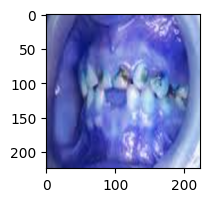

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [11]:
classes = ['no-cavity','cavity']

In [12]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

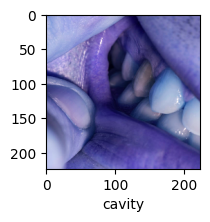

In [13]:
plot_sample(x_train,y_train,24)

In [14]:
y_train[35]

1

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-23 07:51:01.914662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 07:51:01.914780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 07:51:02.067153: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_ds= train_datagen.flow(
        x_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        x_test, y_test, batch_size=32,)

In [17]:
len(train_ds)

8

In [18]:
len(validation_ds)

2

In [19]:
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.applications.vgg19 import VGG19

In [20]:
vgg_19 = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    classifier_activation="sigmoid",
)

model2 = models.Sequential([
    
    ## vgg19 
    vgg_19,
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer= 'SGD',
           loss='binary_crossentropy',
           metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
history2 = model2.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1716450730.960148     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716450730.980231     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/8 ━━━━━━━━━━━━━━━━━━━━ 6:31 56s/step - accuracy: 0.0500 - loss: 0.8130

W0000 00:00:1716450811.629008     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.6836 - loss: 0.6140 

W0000 00:00:1716450816.152852     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 155s 14s/step - accuracy: 0.7033 - loss: 0.5942 - val_accuracy: 0.9091 - val_loss: 0.2517
Epoch 2/10


W0000 00:00:1716450830.763891     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 543ms/step - accuracy: 0.9297 - loss: 0.2007 - val_accuracy: 0.9091 - val_loss: 0.3436
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 524ms/step - accuracy: 0.9432 - loss: 0.1889 - val_accuracy: 0.9091 - val_loss: 0.2027
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 529ms/step - accuracy: 0.9414 - loss: 0.2137 - val_accuracy: 0.9091 - val_loss: 0.3136
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 534ms/step - accuracy: 0.9381 - loss: 0.1838 - val_accuracy: 0.9091 - val_loss: 0.1996
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 545ms/step - accuracy: 0.9545 - loss: 0.1291 - val_accuracy: 0.9091 - val_loss: 0.1525
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 552ms/step - accuracy: 0.8776 - loss: 0.2489 - val_accuracy: 0.9091 - val_loss: 0.1546
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 561ms/step - accuracy: 0.9298 - loss: 0.1285 - val_accuracy: 0.9091 - val_loss: 0.2012
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 560ms/step - accuracy: 0.9269 - loss: 0.1182 - val_accuracy: 0.9091 - val_loss: 0.1448
Epo

In [22]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    25,089,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,614,387 (174.01 MB)

 Trainable params: 45,614,385 (174.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

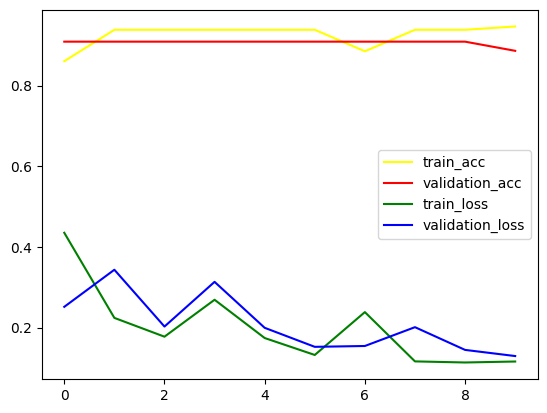

In [23]:
plt.plot(history2.history['accuracy'], color='yellow', label='train_acc')
plt.plot(history2.history['val_accuracy'], color='red', label='validation_acc')
plt.plot(history2.history['loss'], color='green', label='train_loss')
plt.plot(history2.history['val_loss'], color='blue', label='validation_loss')
plt.legend()

In [24]:
def convert_into_categorical(y):
    length=len(y)
    for i in range(length):
        y = y.astype(int)
    return y

In [25]:
y_pred = model2.predict(x_test)
y_pred=convert_into_categorical(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step

W0000 00:00:1716450892.888144     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


W0000 00:00:1716450893.564503     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[ 0,  4],
       [ 2, 38]])

Text(70.72222222222221, 0.5, 'Actual')

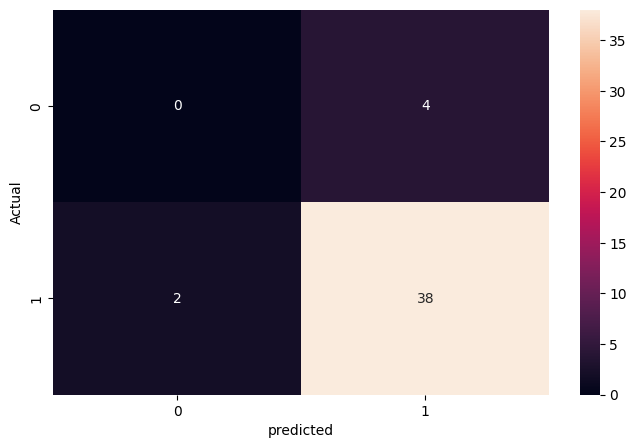

In [26]:
import seaborn as sb
plt.figure(figsize=(8,5))
sb.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.90      0.95      0.93        40

    accuracy                           0.86        44
   macro avg       0.45      0.47      0.46        44
weighted avg       0.82      0.86      0.84        44



In [29]:
from sklearn.metrics import roc_curve

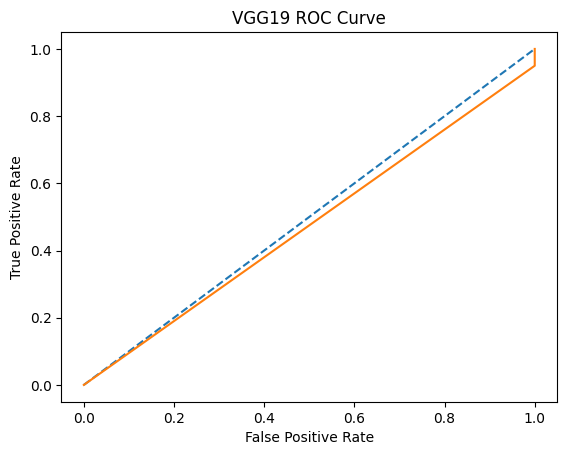

In [30]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('VGG19 ROC Curve')
plt.show()

predicted: cavity


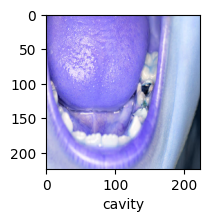

In [31]:
plot_sample(x_test, y_test, 1)
print("predicted:" ,classes[y_pred[1][0]])

predicted: cavity


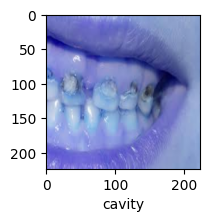

In [32]:
plot_sample(x_test, y_test, 12)
print("predicted:" ,classes[y_pred[12][0]])